# Dataset Used
### heart disease prediction
<a href='https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression' >Download from here</a>

# Downloading Dataset

In [76]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression')

Skipping, found downloaded files in ".\heart-disease-prediction-using-logistic-regression" (use force=True to force download)


# Importing required library

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [78]:
df = pd.read_csv('heart-disease-prediction-using-logistic-regression/framingham.csv')

In [79]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# DataCleaning

In [80]:
df.drop(columns=['education'],axis=1,inplace=True)

In [81]:
df.shape

(4238, 15)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [83]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [84]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [85]:
fill_mean=['cigsPerDay','totChol','BMI','heartRate','glucose']
for i in fill_mean:
    mean_value=df[i].mean()
    df[i].fillna(mean_value,inplace=True)


In [86]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode().iloc[0])

In [87]:
# df.isnull().sum()
print("Contains NaN values", df.isna().any().any())

Contains NaN values False


# Performing EDA

In [88]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: >

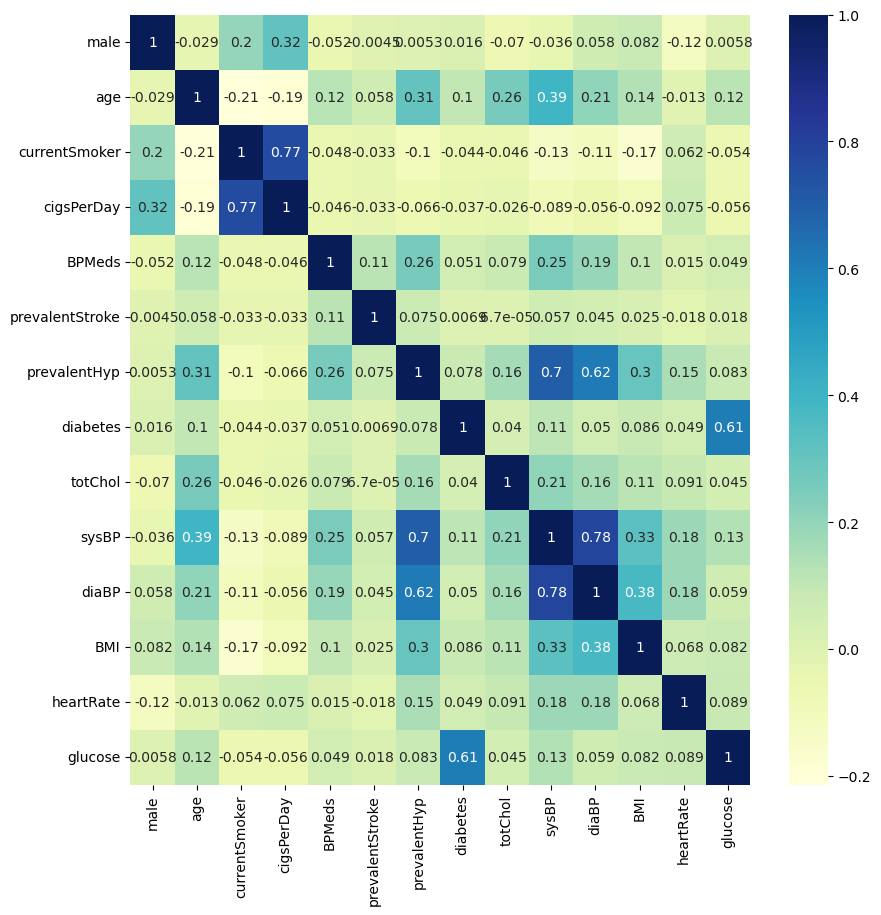

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(columns=['TenYearCHD'],axis=1).corr(),annot=True,cmap='YlGnBu')

In data science, it's essential to understand how to deal with highly correlated features. Highly correlated features refer to variables that have a strong linear relationship with each other. When two or more variables are highly correlated, they carry almost the same information, making it redundant to include all of them in a model. This can lead to a problem known as multicollinearity where it becomes difficult to determine the independent effect of each variable on the target variable. To address this issue, removing features with high correlation is advisable to improve the efficiency and accuracy of the prediction model. Thus, removing highly correlated variables is a crucial step in data preprocessing and can help improve the performance of your machine-learning models

In [90]:
df.drop(columns=['diaBP','prevalentHyp','currentSmoker','diabetes'], inplace=True)

<Axes: >

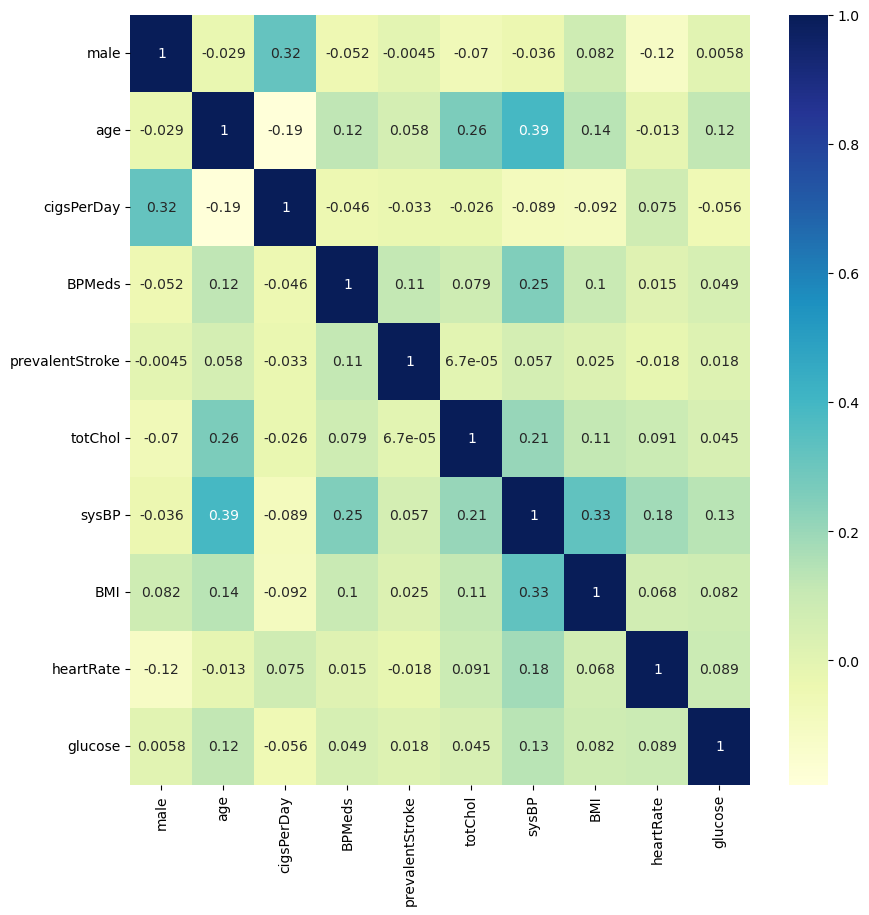

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(columns=['TenYearCHD'],axis=1).corr(),annot=True,cmap='YlGnBu')

### EDA for categorical features

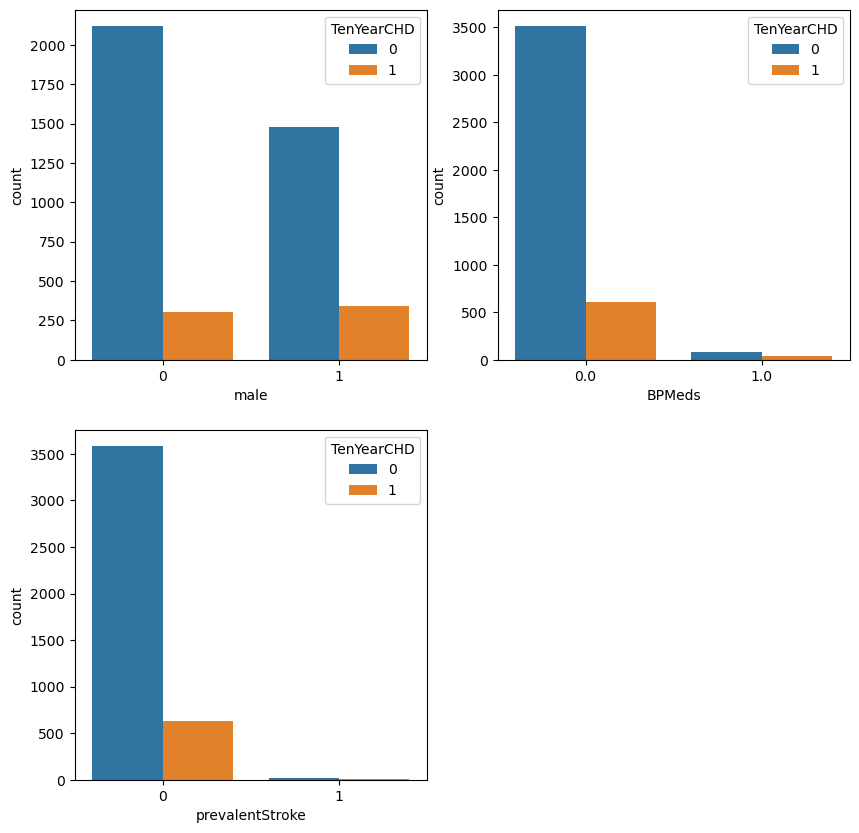

In [92]:
row,col=2,2
categorical=['male','BPMeds','prevalentStroke']
j=1
plt.figure(figsize=(10,10))
for i in categorical:
    plt.subplot(row,col,j)
    sns.countplot(hue='TenYearCHD',x=i,data=df)
    j+=1
plt.show()

### EDA on nonCategorical features

<Figure size 1000x1000 with 0 Axes>

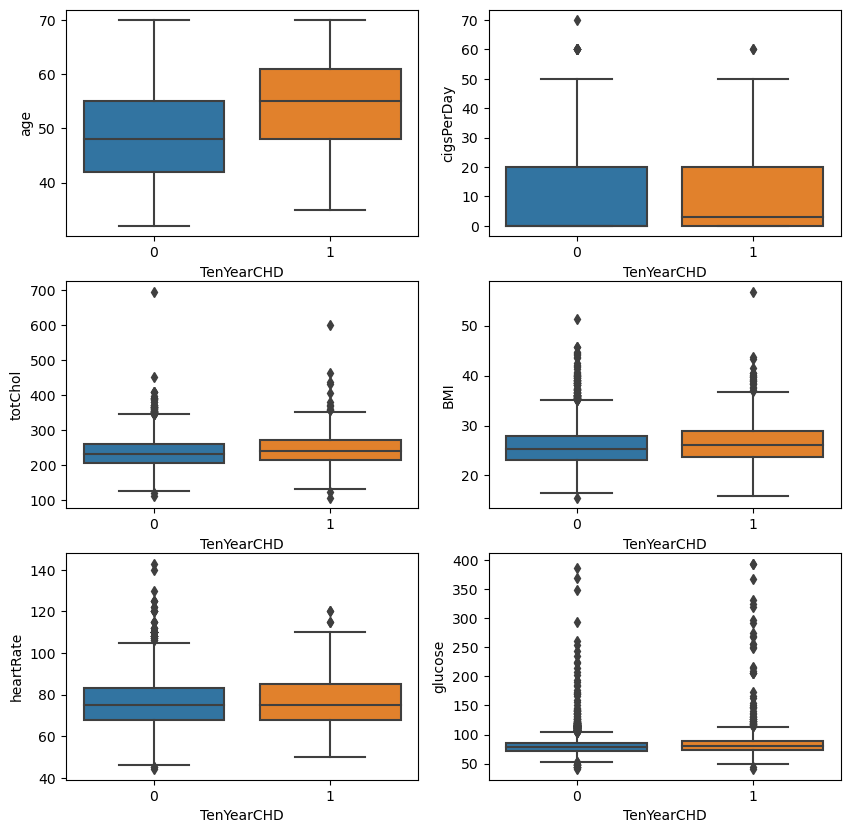

In [93]:
row,col=3,2
plt.figure(figsize=(10,10))
categorical=['age','cigsPerDay','totChol','BMI','heartRate','glucose']
j=1
plt.figure(figsize=(10,10))
for i in categorical:
    plt.subplot(row,col,j)
    sns.boxplot(y=i,x='TenYearCHD',data=df)
    j+=1
plt.show()

### observations
older people have high chance of heart disease fig 1

# DATA Preprocessing

In [94]:
y = df['TenYearCHD']
x = df.drop(columns=['TenYearCHD'],axis=1)

In [95]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [96]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y ,test_size=0.2,random_state=42)

# Preparing , Training , Testing Models

In [97]:
logistic_reg_model = LogisticRegression()
decisoin_tree_model = DecisionTreeClassifier(max_depth=3)
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

In [98]:
logistic_reg_model.fit(x_train,y_train)
decisoin_tree_model.fit(x_train,y_train)
random_forest_model.fit(x_train,y_train)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [99]:
models = [logistic_reg_model,decisoin_tree_model,random_forest_model,knn_model]
train=[]
test=[]
for i in models:
    train_score = float("{:.2f}".format(i.score(x_train,y_train)))
    test_score = float("{:.2f}".format(i.score(x_test,y_test)))
    train.append(train_score)
    test.append(test_score)
    print('Model name ',i)
    print('Train accuracy ',train_score*100)
    print('Test accuracy ',test_score*100)



Model name  LogisticRegression()
Train accuracy  85.0
Test accuracy  86.0
Model name  DecisionTreeClassifier(max_depth=3)
Train accuracy  85.0
Test accuracy  85.0
Model name  RandomForestClassifier()
Train accuracy  100.0
Test accuracy  85.0
Model name  KNeighborsClassifier()
Train accuracy  87.0
Test accuracy  85.0


In [100]:
result = pd.DataFrame({'Models':models,
                       'Traning Score':train,
                       'Testing Score':test
                       })
result

,Models,Traning Score,Testing Score
0,LogisticRegression(),0.85,0.86
1,DecisionTreeClassifier(max_depth=3),0.85,0.85
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,0.85
3,KNeighborsClassifier(),0.87,0.85


In [101]:
result['Models'][2]='RandomForestClassifier()'

C:\Users\laksh\AppData\Local\Temp\ipykernel_17280\4208754029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Models'][2]='RandomForestClassifier()'


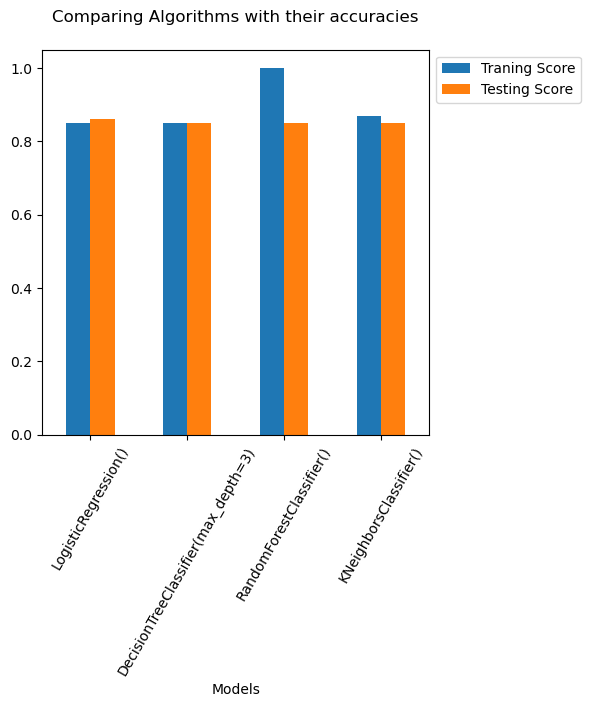

In [102]:
import matplotlib.pyplot as plt
result.plot(
        x='Models', 
        y=['Traning Score','Testing Score'], 
        kind='bar', 
        figsize=(5,5)).legend( bbox_to_anchor =(1 ,1))
plt.title('Comparing Algorithms with their accuracies',pad=20)
plt.xticks(rotation=60)
plt.show()